In [1]:
import sys
sys.setrecursionlimit(10000)

In [2]:
import pandas as pd
from sent2vec.vectorizer import Vectorizer
from sklearn.cluster import KMeans
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy import spatial
from pathlib import Path

In [3]:
data = pd.read_pickle('data/full_data_sentences.pkl')

In [ ]:
data.head()

In [ ]:
data.drop(columns=['is_claim'], inplace=True)
data.head()

In [ ]:
data = data.sample(frac=1)
data = data[:2000]
data.reset_index(inplace=True, drop=True)

In [17]:
vectorizer = Vectorizer()

In [18]:
vectorizer.bert(data["sentences"].tolist())
vectors_sents = vectorizer.vectors

AttributeError: 'NoneType' object has no attribute 'axes'

In [19]:
true_k = 3
model = KMeans(n_clusters=true_k, random_state=3)
model.fit(vectors_sents)

NameError: name 'vectors_sents' is not defined

In [20]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=3)
reduced_features = pca.fit_transform(vectors_sents)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

NameError: name 'vectors_sents' is not defined

Text(0.5, 1.0, 'K-means sentences (3 clusters)')

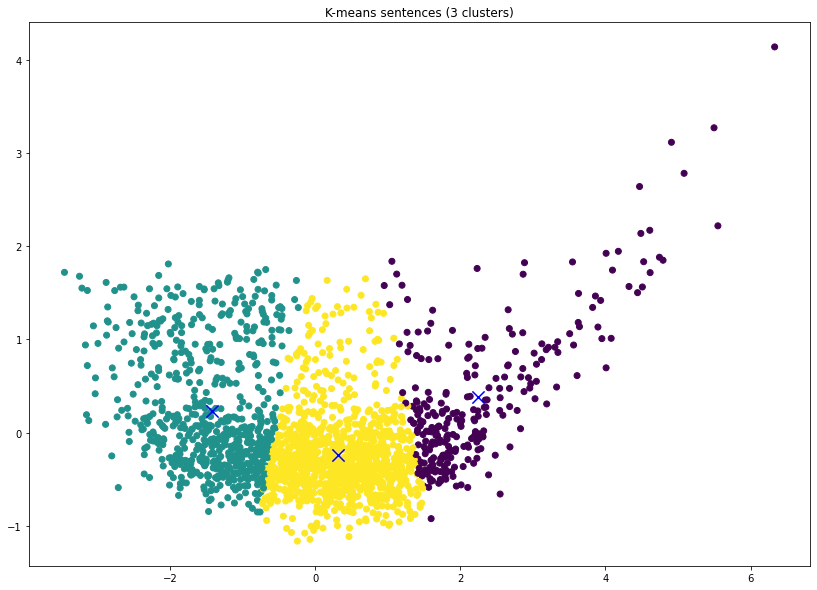

In [8]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(vectors_sents))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.title("""K-means sentences (3 clusters)""")

In [9]:
true_k = 4
model_2 = KMeans(n_clusters=true_k, random_state=3)
model_2.fit(vectors_sents)

KMeans(n_clusters=4, random_state=3)

In [10]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=3)
reduced_features = pca.fit_transform(vectors_sents)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model_2.cluster_centers_)

Text(0.5, 1.0, 'K-means sentences (4 clusters)')

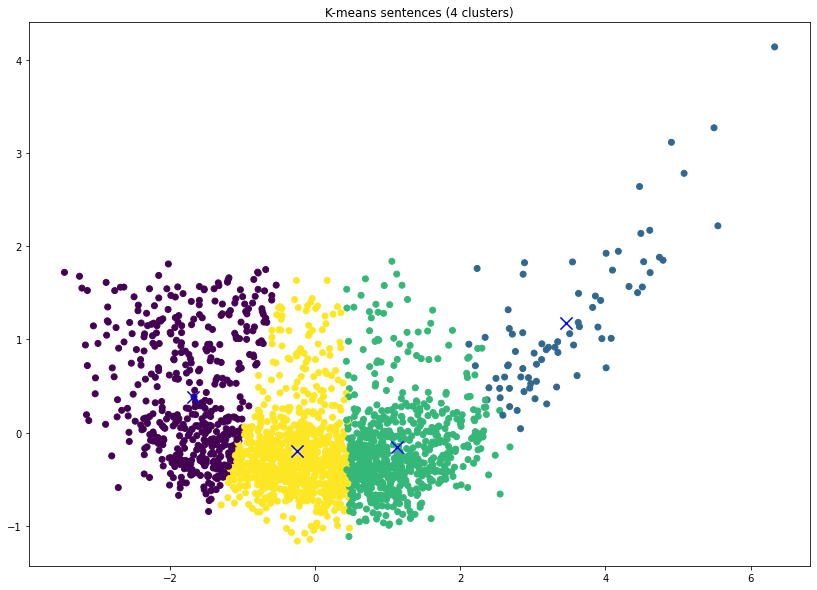

In [11]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model_2.predict(vectors_sents))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.title("""K-means sentences (4 clusters)""")

In [12]:
data['bert embeddings'] = vectors_sents.tolist()

In [13]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

for index in range(len(data)):
    cluster_0.append(spatial.distance.cosine(model.cluster_centers_[0], data['bert embeddings'][index]))
    cluster_1.append(spatial.distance.cosine(model.cluster_centers_[1], data['bert embeddings'][index]))
    cluster_2.append(spatial.distance.cosine(model.cluster_centers_[2], data['bert embeddings'][index]))

In [14]:
data['similarity with cluster 0'] = cluster_0
data['similarity with cluster 1'] = cluster_1
data['similarity with cluster 2'] = cluster_2

In [15]:
data.head()

,sentences,bert embeddings,similarity with cluster 0,similarity with cluster 1,similarity with cluster 2
0,Studies have consistently shown that males per...,"[0.23478595912456512, -0.10269953310489655, 0....",0.099342,0.014182,0.046334
1,Brains of 6-month-old mice contained nuclear R...,"[-0.12217199802398682, -0.24420246481895447, -...",0.016167,0.076676,0.033051
2,Our results demonstrate the critical role of a...,"[0.16823969781398773, -0.1334538459777832, 0.2...",0.066392,0.011980,0.020522
3,A high sensitive label-free electrochemilumine...,"[-0.1457490473985672, -0.2858133316040039, 0.0...",0.023105,0.082963,0.037846
4,We conclude that expression of survivin is a d...,"[0.09400983899831772, -0.15297290682792664, 0....",0.015432,0.037464,0.010353


In [20]:
data['similarity with cluster 2'].mean()

0.020492439865774082